# 4. Técnicas multivariadas
## 4.1. ANOVA

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---

In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


def one_way_anova_plot(figsize=(10, 8)):
    # Construct data as a pd.DataFrame
    a = np.random.normal(0, 1, 20)
    b = np.random.normal(-2, 1, 20)
    c = np.random.normal(3, 1, 20)
    d = np.random.normal(1.5, 1, 20)

    df = pd.DataFrame()
    df["y"] = np.concatenate([a, b, c, d])
    df["group_2"] = np.concatenate(
        [np.zeros_like(b)] + [np.ones_like(b)] + 2 * [np.zeros_like(b)]
    )
    df["group_3"] = np.concatenate(
        2 * [np.zeros_like(c)] + [np.ones_like(c)] + [np.zeros_like(c)]
    )
    df["group_4"] = np.concatenate(3 * [np.zeros_like(d)] + [np.ones_like(d)])

    # ANOVA equivalent linear model
    res = smf.ols("y ~ 1 + group_2 + group_3 + group_4", df).fit()
    beta0, beta1, beta2, beta3 = res.params

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(0 * np.ones_like(a), a, color="k")
    ax.scatter(1 * np.ones_like(b), b, color="k")
    ax.scatter(2 * np.ones_like(c), c, color="k")
    ax.scatter(3 * np.ones_like(d), d, color="k")

    # Group 1 (baseline)
    ax.axhline(beta0, color="b", label=r"$\beta_0$ (grupo 1, media)")

    # grupo 2
    ax.plot([0.7, 1.3], 2 * [beta0 + beta1], color="navy")
    ax.plot(
        [0, 1],
        [beta0, beta0 + beta1],
        color="r",
        label=r"$\beta_1, \beta_2, ...$ (pendientes-diferencias a $\beta_0$)",
    )

    # grupo 3
    ax.plot(
        [1.7, 2.3],
        2 * [beta0 + beta2],
        color="navy",
        label=r"$\beta_0+\beta_1, \beta_0+\beta_2 ...$ (medias de grupos)",
    )
    ax.plot([1, 2], [beta0, beta0 + beta2], color="r")

    # Group 4
    ax.plot([2.7, 3.3], 2 * [beta0 + beta3], color="navy")
    ax.plot([2, 3], [beta0, beta0 + beta3], color="r")

    ax.legend(fontsize=10, loc="upper left")

    return fig, ax


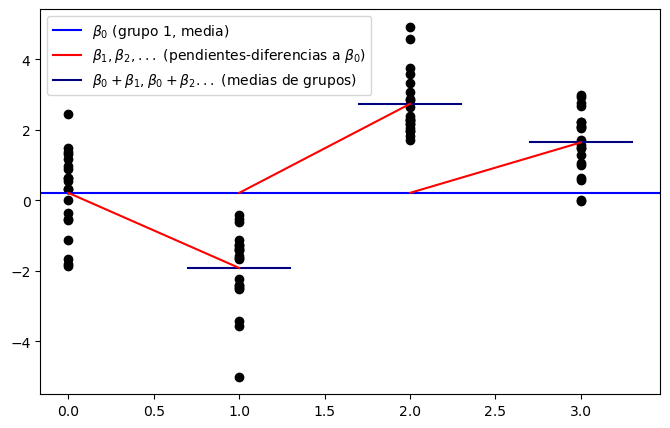

In [10]:
one_way_anova_plot(figsize=(8, 5));

## 4.2. MANOVA

## 4.3. ANCOVA